# Final Exam Second Semester 2566 - Support Vector Machine (Raisin Problem)

This exam problem has an objective to develop a support vector machine model to classify the raisin types whether they are Kecimen (class 0) or Besni (class 1) from 7 features.

Cr: This dataset is adapted from CINAR I., KOKLU M. and TASDEMIR S., (2020). Classification of Raisin Grains Using Machine Vision and Artificial Intelligence Methods, Gazi Journal of Engineering Sciences, vol. 6, no. 3, pp. 200-209, December, 2020, DOI: https://doi.org/10.30855/gmbd.2020.03.03

In [27]:
#importing library
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import utils_svm as utils


### We start the exam by first loading the dataset

In [28]:
# Load training dataset and test dataset
data = np.loadtxt(r'C:\Users\panda\OneDrive\Desktop\fifaaa\Data\SVM_RaisinData_Train.txt')
X, y = data[:, :7], data[:, 7].astype(int)
# First 7 columns of data are features and the last column is the label.
# Matrix X contains 7 features while vector y contains the label.
m = y.size  # number of training examples
data_test = np.loadtxt(r'C:\Users\panda\OneDrive\Desktop\fifaaa\Data\SVM_RaisinData_Test.txt')
X_test, y_test = data_test[:, :7], data_test[:, 7].astype(int)


In [29]:
X.shape, y.shape

((697, 7), (697,))

In [30]:
X_test.shape, y_test.shape

((200, 7), (200,))

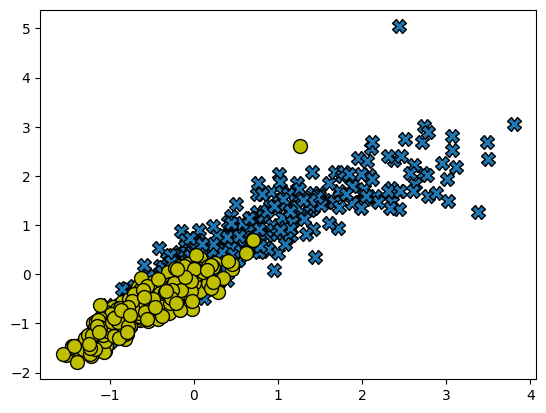

In [31]:
# Plot training data
utils.plotData(X, y)
plt.show()

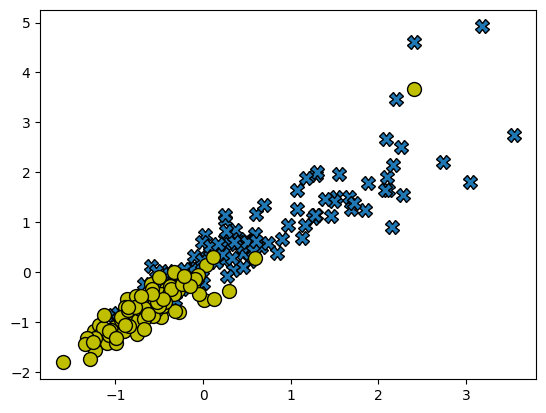

In [32]:
#plot test set
utils.plotData(X_test, y_test )
plt.show()

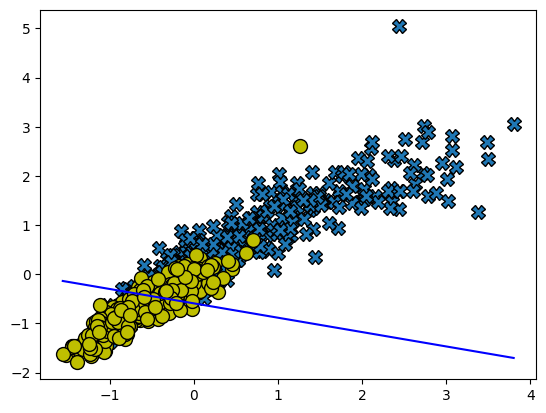

In [33]:
#plot decision boundaries by the C to see how the decision
C = 1 #adjust

model = utils.svmTrain(X, y, C, utils.linearKernel, 1e-3, 20) 
utils.visualizeBoundaryLinear(X, y, model)
plt.show()

In [34]:
def gaussianKernel(x1, x2, sigma):
    sim = 0
    sim = np.exp(-(np.sum(np.square(x1-x2)))/(2*np.square(sigma)))
    return sim

In [35]:
#test Kernel function
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
sim = gaussianKernel(x1, x2, sigma)
print('sigma = %0.2f:'
      '\n\t%f\n(for sigma = 2, this value should be about 0.324652)\n' % (sigma, sim))

sigma = 2.00:
	0.324652
(for sigma = 2, this value should be about 0.324652)



In [36]:
C_array = np.array([0.1,0.3,1,3])
sigma_array = np.array([0.1,0.3,1,3])

In [37]:
def dataset3Params(X, y, X_test, y_test): 
    C = 1
    sigma = 0.3
    C_array = np.array([0.1,0.3,1,3])
    sigma_array = np.array([0.1,0.3,1,3])
    err_array = np.zeros([C_array.size, sigma_array.size,])
    for i in range(C_array.size):
        for j in range(sigma_array.size):
            model = utils.svmTrain(X, y, C_array[i], gaussianKernel, args = (sigma_array[j],))
            predictions = utils.svmPredict(model, X_test) 
            pred_error = np.mean(predictions != y_test) 
            err_array[i,j] = pred_error
    ind = np.unravel_index(np.argmin(err_array, axis = None), err_array.shape)
    C = C_array[ind[0]]
    sigma = sigma_array[ind[1]]
    
    return C, sigma

<blockquote>Testing

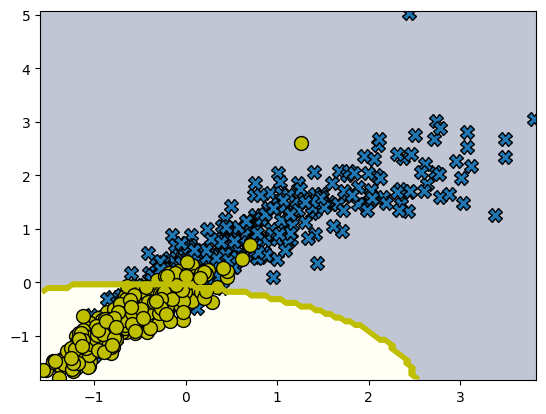

In [40]:
# Suppose X has many features; pick the first 2 for visualization
X_vis = X[:, :2]

# Train SVM only on these 2 features
model = utils.svmTrain(X_vis, y, C, gaussianKernel, args=(sigma,))

# Then plot
utils.visualizeBoundary(X_vis, y, model)


In [ ]:
# Determine the best SVM parameters (C and sigma) here
C, sigma = dataset3Params(X, y, X_test, y_test)

# Train the SVM using the best parameters (C and sigma) we got from dataset3Params function
model = utils.svmTrain(X, y, C, gaussianKernel, args=(sigma,)) #using Gaussian
utils.visualizeBoundary(X, y, model)
print(C, sigma)
plt.show()

In [41]:
# Predict using only the same features the model was trained on:
p = utils.svmPredict(model, X[:, :2])
print('Training Accuracy: %.2f' % (np.mean(p == y) * 100))

p_test = utils.svmPredict(model, X_test[:, :2])
print('Test Accuracy: %.2f' % (np.mean(p_test == y_test) * 100))


Training Accuracy: 85.65
Test Accuracy: 88.00


In [42]:
# Load a new dataset from 3 examples
# This dataset will be used for the last question of this exam problem.
data_new = np.loadtxt(r'C:\Users\panda\OneDrive\Desktop\fifaaa\Data\SVM_RaisinData_Test.txt')
X_new = data_new[:, 0:7]
X_new
# This dataset contains only 7 features and does not have label.
# Matrix X_new contains 7 features.

array([[-0.74672923, -0.5386634 , -0.96350204, ..., -0.729105  ,
        -1.36340154, -0.61964762],
       [-0.57945192, -0.51547008, -0.54153213, ..., -0.57043601,
        -0.58388995, -0.43126643],
       [ 1.6690921 ,  1.50402183,  1.53996477, ...,  1.66572005,
        -2.06573866,  1.54655246],
       ...,
       [ 2.08134707,  1.64077096,  1.98318511, ...,  2.06980008,
         1.09387097,  1.8152292 ],
       [-0.21892849, -0.07354957, -0.24766865, ..., -0.23078792,
         1.03923068, -0.22589082],
       [ 0.12634342, -0.54162084,  1.32980957, ...,  0.07725628,
         0.95293616, -0.10002694]])

In [43]:
p_new = utils.svmPredict(model,X_new[:, :2])
print(p_new)

[0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 0. 0.]


1 2


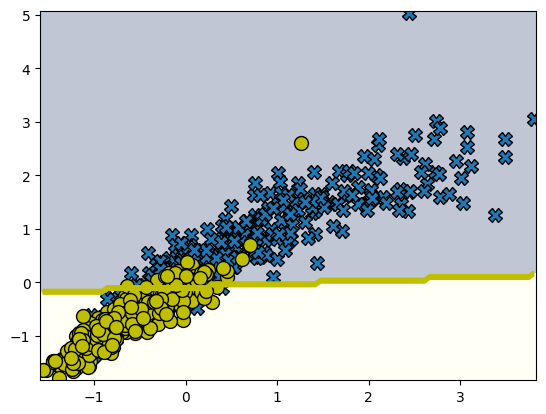

In [44]:
# Use only the first 2 features for visualization
X_vis = X[:, :2]

# Train the SVM on the 2D data
model = utils.svmTrain(X_vis, y, C, utils.linearKernel)

# Now you can plot it
utils.visualizeBoundary(X_vis, y, model)
print(C, sigma)
plt.show()


In [45]:
# Predict using only the same features the model was trained on:
p = utils.svmPredict(model, X[:, :2])
print('Training Accuracy: %.2f' % (np.mean(p == y) * 100))

p_test = utils.svmPredict(model, X_test[:, :2])
print('Test Accuracy: %.2f' % (np.mean(p_test == y_test) * 100))

Training Accuracy: 85.80
Test Accuracy: 87.50


In [46]:
# Load a new dataset from 3 examples
# This dataset will be used for the last question of this exam problem.
data_new = np.loadtxt(r'C:\Users\panda\OneDrive\Desktop\fifaaa\Data\SVM_RaisinData_Test.txt')
X_new = data_new[:, 0:7]
X_new
# This dataset contains only 7 features and does not have label.
# Matrix X_new contains 7 features.

array([[-0.74672923, -0.5386634 , -0.96350204, ..., -0.729105  ,
        -1.36340154, -0.61964762],
       [-0.57945192, -0.51547008, -0.54153213, ..., -0.57043601,
        -0.58388995, -0.43126643],
       [ 1.6690921 ,  1.50402183,  1.53996477, ...,  1.66572005,
        -2.06573866,  1.54655246],
       ...,
       [ 2.08134707,  1.64077096,  1.98318511, ...,  2.06980008,
         1.09387097,  1.8152292 ],
       [-0.21892849, -0.07354957, -0.24766865, ..., -0.23078792,
         1.03923068, -0.22589082],
       [ 0.12634342, -0.54162084,  1.32980957, ...,  0.07725628,
         0.95293616, -0.10002694]])

In [25]:
p_new = utils.svmPredict(model,X_new[:, :2])
print(p_new)

[0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 0.]


### End of Support Vector Machine Problem